# Brazilian cities to travel

<b> Goal: </b> This portfolio project showcases our expertise in data analysis through an in-depth examination of Brazilian cities identified by the Brazilian Ministry of Tourism as key destinations in their public policy plan (Mapa do Turismo/Tourism Map)

In [2]:
## adicionar índice [[indice]]

## 1. Descriptive Analysis

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [4]:
df = pd.read_excel(r"data\relatorio_categorizacao_2019-portal.xls")

df.head()

,MACRO,UF,REGIAO_TURISTICA,MUNICIPIO,COD_IBGE,QUANTIDADE_EMPREGOS,QUANTIDADE_ ESTABELECIMENTOS,QUANTIDADE_VISITAS_ESTIMADAS_ INTERNACIONAL,QUANTIDADE_VISITAS_ESTIMADAS_ NACIONAL,ARRECADACAO,CLUSTER
0,Centro-Oeste,MT,Região Turística Portal do Agronegócio,Nova Mutum,5106224,89,14,0,15309,708887,C
1,Nordeste,MA,Polo Lagos e Campos Floridos,Cajapió,2102408,0,0,0,1376,0,D
2,Sudeste,MG,Caminhos da Mantiqueira,Brazópolis,3108909,6,3,0,25587,0,D
3,Sudeste,MG,Ouro,Caeté,3110004,310,11,0,23757,4944942,B
4,Sudeste,MG,Pedras Preciosas,Catuji,3115458,0,0,149,0,0,D


In [5]:
#showcasing data types and non-null cells in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2694 entries, 0 to 2693
Data columns (total 11 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   MACRO                                        2694 non-null   object
 1   UF                                           2694 non-null   object
 2   REGIAO_TURISTICA                             2694 non-null   object
 3   MUNICIPIO                                    2694 non-null   object
 4   COD_IBGE                                     2694 non-null   int64 
 5   QUANTIDADE_EMPREGOS                          2694 non-null   int64 
 6   QUANTIDADE_ ESTABELECIMENTOS                 2694 non-null   int64 
 7   QUANTIDADE_VISITAS_ESTIMADAS_ INTERNACIONAL  2694 non-null   int64 
 8   QUANTIDADE_VISITAS_ESTIMADAS_ NACIONAL       2694 non-null   int64 
 9   ARRECADACAO                                  2694 non-null   int64 
 10  CLUSTER     

All cells have information in them, there isn't a single null object in this dataset. With the information that we have so far, no conclusion can be made, but this description can be further explore in other data.

### 1.1 Distribution of Turistic States

In [6]:
#distribution of uf (States) in the 2019 dataset

#creating the pivot_table in which the pie chart will be based on
df_count_uf = pd.pivot_table(data = df,
                             values = 'MUNICIPIO',
                             index = 'UF',
                             aggfunc='count').sort_values(by='MUNICIPIO',ascending=False).reset_index()

df_count_uf['% MUNICIPIO TURISMO'] = round((df_count_uf['MUNICIPIO']/df_count_uf['MUNICIPIO'].sum())*100,1)

df_count_uf.head()

,UF,MUNICIPIO,% MUNICIPIO TURISMO
0,MG,471,17.5
1,SP,354,13.1
2,RS,345,12.8
3,PR,217,8.1
4,SC,177,6.6


In [7]:
# comparing the distribution in the categorized dataset to that of all brazilian cities

df_munic = pd.read_excel(r"data\RELATORIO_DTB_BRASIL_MUNICIPIO.xls", header = 6)

df_munic.shape

(5570, 14)

In [60]:
# making a pivot table of the total cities in Brazil 
#in order to compare the distribution of the total turist cities 

df_count_munic_total = pd.pivot_table(data = df_munic,
                             values = 'MUNICIPIO',
                             index = 'UF',
                             aggfunc='count').sort_values(by='MUNICIPIO',ascending=False).reset_index()

df_count_munic_total['% MUNICIPIO TOTAL'] = round((df_count_munic_total['MUNICIPIO']/df_count_munic_total['MUNICIPIO'].sum())*100,1)

#merging the first pivot table and the total
df_compare = pd.merge(df_count_uf[['UF','% MUNICIPIO TURISMO']],
                     df_count_munic_total[['UF','% MUNICIPIO TOTAL']], 
                     how = "outer", 
                     on='UF')

df_compare = df_compare.melt(id_vars='UF',value_name='% Percentage',var_name = 'Proportion').rename(columns=str.title)

df_compare.head()

,Uf,Proportion,% Percentage
0,MG,% MUNICIPIO TURISMO,17.5
1,SP,% MUNICIPIO TURISMO,13.1
2,RS,% MUNICIPIO TURISMO,12.8
3,PR,% MUNICIPIO TURISMO,8.1
4,SC,% MUNICIPIO TURISMO,6.6


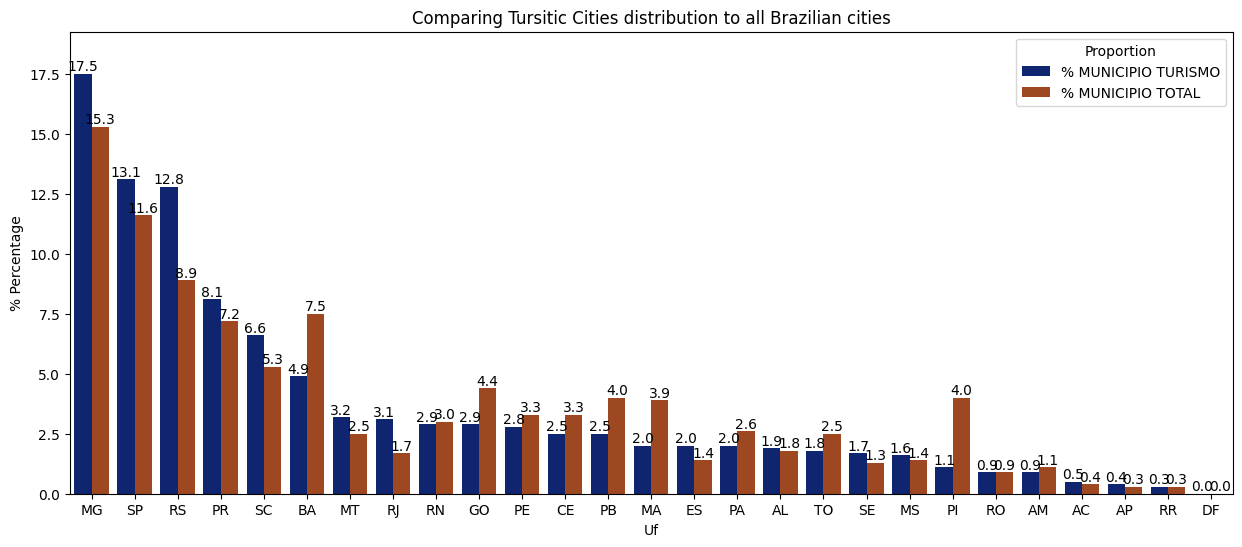

In [61]:
plt.figure(figsize=(15,6))
fig_states = sns.barplot(
            data=df_compare, 
            x="Uf", 
            y="% Percentage", 
            hue="Proportion",
            palette="dark"
)

fig_states.set_title("Comparing Tursitic Cities distribution to all Brazilian cities")
fig_states.margins(y=0.1) # make room for the labels
for bars in fig_states.containers:
   fig_states.bar_label(bars, fmt='%.1f')



Generally, <b> the distribution accompanies the general distribution of cities in Brazil as a whole </b>. Some notable exceptions are: RS (Rio Grande do Sul), BA (Bahia) and PI (Piauí). Therefore, we can conclude that there is not a significant misrepresentation of each reagion, even though the database is imbalanced.

### 1.2 Quantitative Measures

In [10]:
#seeing most numbers
df.describe()

,COD_IBGE,QUANTIDADE_EMPREGOS,QUANTIDADE_ ESTABELECIMENTOS,QUANTIDADE_VISITAS_ESTIMADAS_ INTERNACIONAL,QUANTIDADE_VISITAS_ESTIMADAS_ NACIONAL,ARRECADACAO
count,2.694000e+03,2694.000000,2694.000000,2.694000e+03,2.694000e+03,2.694000e+03
mean,3.405169e+06,93.380475,7.516333,3.850519e+03,6.383554e+04,1.238121e+06
std,9.310852e+05,555.239839,26.203060,4.667117e+04,3.930170e+05,1.310179e+07
min,1.100015e+06,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.905852e+06,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.302650e+06,6.000000,2.000000,3.800000e+01,5.376500e+03,0.000000e+00
75%,4.205982e+06,35.000000,6.000000,3.730000e+02,2.789175e+04,0.000000e+00
max,5.300108e+06,17946.000000,785.000000,1.651696e+06,1.347863e+07,4.733092e+08


Looking at the numbers above, there are noteworthy trends that need to be discussed:
1) <b> ZEROS:</b> On most columns, the lower quartile is 0, what shows that a good chunk of the data is 0. To understand the distribution of these columns, let's create a histogram and a boxplot. This will reveal potential outliers, skew, and normality, which are crucial for further analysis. This information, accompanied to the fact that there isn't a single null in this dataset, turns us to the hypothesis that missing values were replaced with zeros. <br>
<br>
2) <b> MEAN versus MEDIAN:</b> A common way to infer the distribution of data is looking through the difference between the values of mean and median. In this dataset, there is a significant distance between both metrics, signalizing that there many outliers and internal groups that can be categorized. Therefore, it is important to analyze how the categories (column "CLUSTER") differ in each metric. <br>

#### 1.21 ZEROS

(0.0, 200.0)

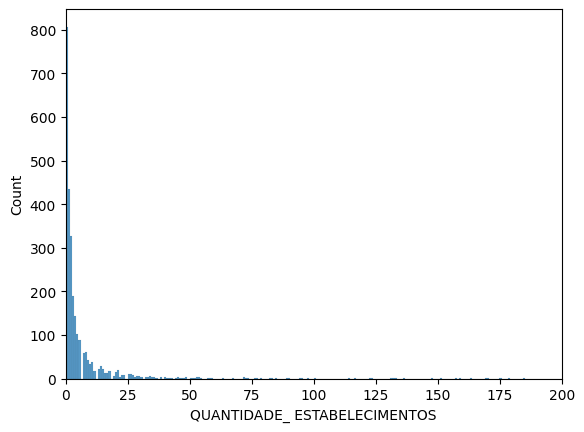

In [67]:
sns.histplot(data = df, 
             x='QUANTIDADE_ ESTABELECIMENTOS').set_xlim(0,200)

In [ ]:
##boxplot de todas as métricas
## count 0 (possi)
## boxplot comparativo entre os "clusters"

## 1.2 Histórico

avaliar quais métricas conseguem ser cruzadas com o histórico 2016 e 2017.